In [14]:
# basi library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scalling 
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# tensorflow
from tensorflow.keras import Sequential
from keras.layers import Dense

#metric
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
columns=['RowNumber','CustomerId','Surname']
data.drop(columns=columns,inplace=True,axis=1)

In [4]:
data['Geography']=data['Geography'].map({
    'France':1,
    'Germany':0,
    'Spain':0
    })

In [5]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [6]:
#train test split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#scalling
sc=StandardScaler()
scaled_Xtrain=sc.fit_transform(X_train)
scaled_Xtest=sc.transform(X_test)

In [8]:
ann=Sequential()
ann.add(Dense(11,activation='relu',input_dim=10))
ann.add(Dense(11,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [9]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [10]:
ann.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [11]:
history=ann.fit(scaled_Xtrain,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 2s 4ms/step - loss: 0.5253 - Accuracy: 0.7875 - val_loss: 0.4653 - val_Accuracy: 0.8125
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4513 - Accuracy: 0.8048 - val_loss: 0.4302 - val_Accuracy: 0.8169
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4276 - Accuracy: 0.8152 - val_loss: 0.4187 - val_Accuracy: 0.8213
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4114 - Accuracy: 0.8245 - val_loss: 0.4047 - val_Accuracy: 0.8281
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3967 - Accuracy: 0.8348 - val_loss: 0.3945 - val_Accuracy: 0.8338
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3848 - Accuracy: 0.8413 - val_loss: 0.3842 - val_Accuracy: 0.8406
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3753 - Accuracy: 0.8480 - val_loss: 0.3770 - val_Accuracy: 0.8431
Epoch 

In [16]:
y_log=ann.predict(scaled_Xtest)

63/63 [==============================] - 0s 2ms/step


In [17]:
y_pred=np.where(y_log>0.5,1,0)

In [18]:
accuracy_score(y_test,y_pred)

0.854

In [20]:
history.history

{'loss': [0.5253491401672363,
  0.4512786865234375,
  0.42758727073669434,
  0.4114151895046234,
  0.39674416184425354,
  0.38478514552116394,
  0.37532639503479004,
  0.36860141158103943,
  0.36448824405670166,
  0.3607388436794281,
  0.3583395779132843,
  0.35653603076934814,
  0.3550277054309845,
  0.35407984256744385,
  0.35296162962913513,
  0.3518393337726593,
  0.3510243892669678,
  0.3498685359954834,
  0.34911972284317017,
  0.3482975363731384],
 'Accuracy': [0.7875000238418579,
  0.8048437237739563,
  0.8151562213897705,
  0.8245312571525574,
  0.8348437547683716,
  0.8412500023841858,
  0.8479687571525574,
  0.8490625023841858,
  0.8515625,
  0.8518750071525574,
  0.8526562452316284,
  0.8521875143051147,
  0.8550000190734863,
  0.8534374833106995,
  0.8539062738418579,
  0.8571875095367432,
  0.8551562428474426,
  0.8565624952316284,
  0.8560937643051147,
  0.8576562404632568],
 'val_loss': [0.4653380215167999,
  0.4301886260509491,
  0.41873452067375183,
  0.4046650826931,

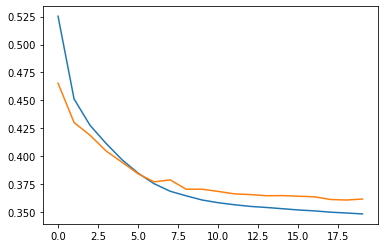

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

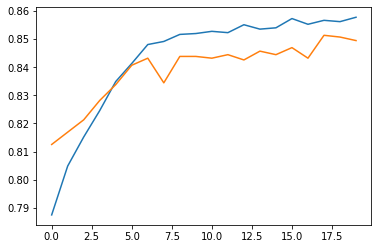

In [27]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])